In [86]:
import cv2
import numpy as np
import geopandas as gpd
import rasterio
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [36]:
raster_path = "/mnt/storage_4tb/ymi/geo_data/40m_for_ori/citrusuco/rgb_504.tif"

In [38]:
with rasterio.open(raster_path, "r") as src:
    meta = src.meta

In [41]:
transform = ~meta['transform']

In [54]:
def convert_polygon(polygon, transform):
    poly_bound = [transform * tuple(pt[:2]) for pt in polygon.exterior.coords]
    poly_bound = np.array(poly_bound, dtype=np.int32)
    return poly_bound

In [55]:
conv_polys = [convert_polygon(polygon, transform) for polygon in gdf['geometry'].values]

In [61]:
calculated_angles = []
for poly in conv_polys:
    try:
        (x,y),(MA,ma),angle = cv2.fitEllipse(poly)
    except:
        angle = np.nan
    calculated_angles.append(angle)

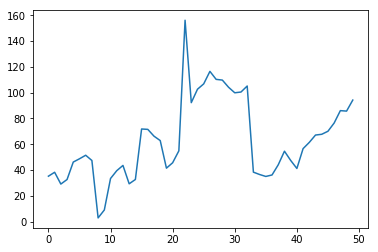

In [69]:
plt.plot(calculated_angles[:50])

In [79]:
init_values = np.array(gdf['angle'].values) - 90
init_values[init_values < 0] = init_values[init_values < 0] + 180

/home/user/.virtualenvs/cv34/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


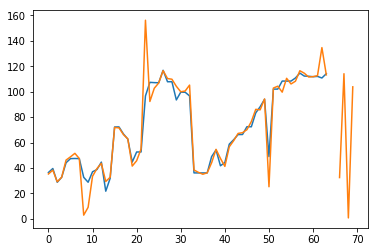

In [85]:
plt.plot(init_values[:70])
plt.plot(calculated_angles[:70])

In [87]:
mean_squared_error(init_values, calculated_angles)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [2]:
poly_path = "/mnt/storage_4tb/ymi/geo_data/40m_for_ori/citrusuco/row_data/504/angle_gt_polygon_180.geojson"

In [3]:
gdf = gpd.read_file(poly_path)

In [57]:
(x,y),(MA,ma),angle = cv2.fitEllipse(conv_polys[0])
print(angle)

35.25841522216797


In [31]:
gdf['angle'].values[0]

126.43329871568824

In [30]:
angle

67.65737915039062

In [23]:
contours = [np.array([[1,1],[10,50],[50,50]], dtype=np.int32) , np.array([[99,99],[99,60],[60,99]], dtype=np.int32)]


In [28]:
cv2.contourArea(np.array(gdf['geometry'].values[0].exterior.coords).astype(np.int32))

49.5

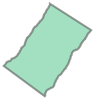

In [32]:
gdf['geometry'].values[0]

In [27]:
np.array(gdf['geometry'].values[0].exterior.coords).astype(np.int32)

array([[ 745473, 7574183],
       [ 745468, 7574187],
       [ 745468, 7574187],
       [ 745468, 7574187],
       [ 745468, 7574187],
       [ 745468, 7574187],
       [ 745468, 7574187],
       [ 745468, 7574187],
       [ 745468, 7574187],
       [ 745468, 7574187],
       [ 745468, 7574187],
       [ 745468, 7574187],
       [ 745469, 7574187],
       [ 745469, 7574187],
       [ 745469, 7574187],
       [ 745469, 7574187],
       [ 745469, 7574188],
       [ 745469, 7574188],
       [ 745469, 7574188],
       [ 745469, 7574188],
       [ 745469, 7574188],
       [ 745469, 7574188],
       [ 745469, 7574188],
       [ 745469, 7574188],
       [ 745469, 7574188],
       [ 745469, 7574188],
       [ 745469, 7574188],
       [ 745469, 7574188],
       [ 745469, 7574188],
       [ 745469, 7574188],
       [ 745469, 7574188],
       [ 745470, 7574188],
       [ 745470, 7574188],
       [ 745470, 7574188],
       [ 745470, 7574188],
       [ 745470, 7574188],
       [ 745470, 7574188],
 